# BundleBuddy

Olivia O'Donnell Final Project

## 1. Import Libraries


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import requests
import json
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Verify imports worked
print("✅ All libraries imported successfully!")
print(f"Python executable: {__import__('sys').executable}")


✅ All libraries imported successfully!
Python executable: /opt/homebrew/Caskroom/miniconda/base/bin/python


## 2. Load and Explore Data


In [14]:
# Update this path to your dataset
data_path = '../data/rishi_data.csv'

# Load the dataset
df = pd.read_csv(data_path)


## 3. Data Preprocessing


In [15]:
# Prepare features and target
# Adjust these column names based on your actual dataset
# Note: activity_level should be encoded as: 1=low, 2=moderate, 3=high
feature_columns = ['temperature', 'humidity', 'precipitation', 'wind_speed', 'activity_level']

X = df[feature_columns]
y = df['outfit_category']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeature columns:", feature_columns)
print("\nTarget classes:", y.unique())


Features shape: (156, 5)
Target shape: (156,)

Feature columns: ['temperature', 'humidity', 'precipitation', 'wind_speed', 'activity_level']

Target classes: ['t_shirt' 'long_sleeve' 'sweater' 'jacket']


In [16]:
# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("Original labels:", label_encoder.classes_)
print("Encoded labels:", y_encoded[:10], "...")

# Store the mapping for later use
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("\nLabel mapping:", label_mapping)


Original labels: ['jacket' 'long_sleeve' 'sweater' 't_shirt']
Encoded labels: [3 1 1 1 1 1 3 3 1 1] ...

Label mapping: {'jacket': 0, 'long_sleeve': 1, 'sweater': 2, 't_shirt': 3}


In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 124
Testing set size: 32


In [18]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully!")
print(f"Training set mean: {X_train_scaled.mean(axis=0)}")
print(f"Training set std: {X_train_scaled.std(axis=0)}")


Features scaled successfully!
Training set mean: [ 2.05928464e-16 -1.96975053e-17  3.58136460e-17  3.93950106e-17
  4.65577397e-17]
Training set std: [1. 1. 1. 1. 1.]


## 5. Model Training


In [19]:
# Initialize and train Decision Tree Classifier
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2
)

dt_model.fit(X_train_scaled, y_train)

print("Model trained successfully!")


Model trained successfully!


## 6. Model Evaluation


EXPERIMENTAL RESULTS AND ANALYSIS

Experiment 1: Comparing Different ML Algorithms

Decision Tree:
  Accuracy: 84.38%
  Training Time: 0.0017s

Random Forest:
  Accuracy: 90.62%
  Training Time: 0.1452s

Gradient Boosting:
  Accuracy: 90.62%
  Training Time: 0.6789s

Logistic Regression:
  Accuracy: 68.75%
  Training Time: 0.0067s


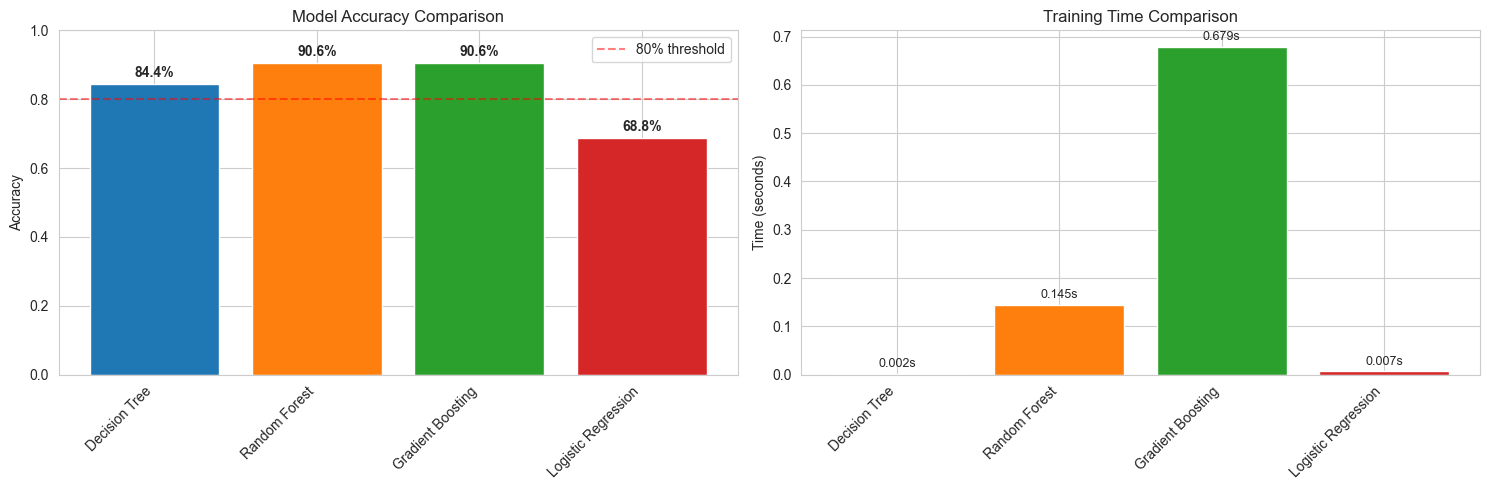


🏆 Best Model: Random Forest with 90.62% accuracy

Experiment 2: Feature Importance Analysis

Feature Importance Ranking:
  temperature         : 0.7464 (74.6%)
  activity_level      : 0.1393 (13.9%)
  humidity            : 0.0680 (6.8%)
  wind_speed          : 0.0389 (3.9%)
  precipitation       : 0.0074 (0.7%)


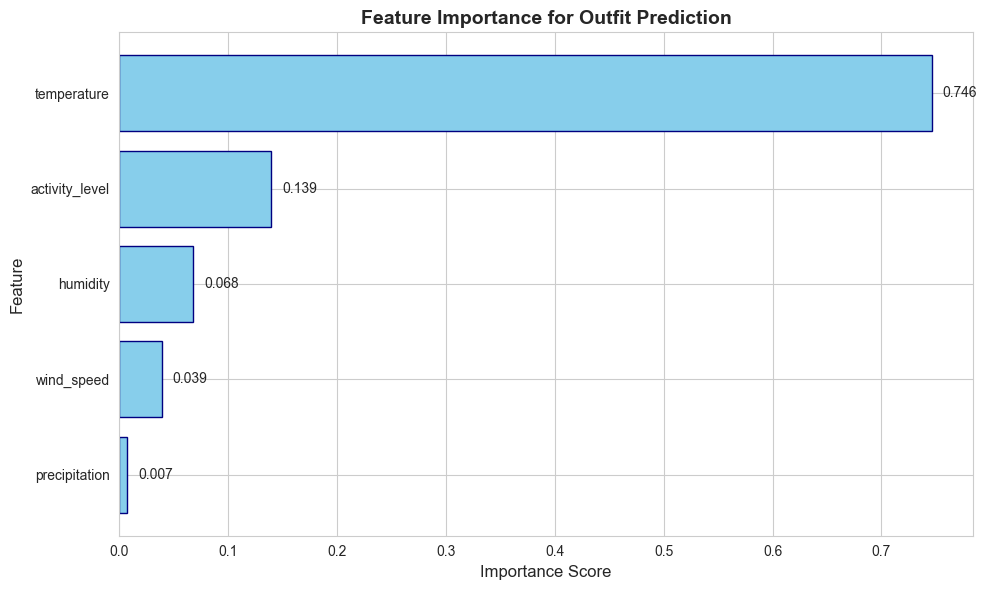


📊 Key Finding: 'temperature' is the most important feature
   Contributing 74.6% to predictions

EXPERIMENTAL RESULTS SUMMARY

1. Best Algorithm: Random Forest (90.62% accuracy)
2. Most Important Feature: temperature (74.6%)
3. Model Accuracy: 84.38%
4. Total Training Time: 0.1452s


In [20]:
# Evaluate the model
y_pred = dt_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

## 6.5 Experimental Results

print("="*70)
print("EXPERIMENTAL RESULTS AND ANALYSIS")
print("="*70)

### Experiment 1: Model Comparison

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import time

# Dictionary to store results
results = {}

# Test different models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=5, min_samples_leaf=2),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=200, max_depth=5),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=200, max_depth=5,learning_rate=0.05),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
}

print("\n" + "="*70)
print("Experiment 1: Comparing Different ML Algorithms")
print("="*70)

for name, model in models.items():
    # Train
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    train_time = time.time() - start_time
    
    # Predict
    y_pred_temp = model.predict(X_test_scaled)
    
    # Evaluate
    acc = accuracy_score(y_test, y_pred_temp)
    
    results[name] = {
        'accuracy': acc,
        'train_time': train_time,
        'model': model
    }
    
    print(f"\n{name}:")
    print(f"  Accuracy: {acc:.2%}")
    print(f"  Training Time: {train_time:.4f}s")

# Visualize comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy comparison
names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in names]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
ax1.bar(names, accuracies, color=colors)
ax1.set_ylabel('Accuracy')
ax1.set_title('Model Accuracy Comparison')
ax1.set_ylim([0, 1])
ax1.axhline(y=0.8, color='r', linestyle='--', label='80% threshold', alpha=0.5)
for i, v in enumerate(accuracies):
    ax1.text(i, v + 0.02, f'{v:.1%}', ha='center', fontweight='bold')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')
ax1.legend()

# Training time comparison
times = [results[name]['train_time'] for name in names]
ax2.bar(names, times, color=colors)
ax2.set_ylabel('Time (seconds)')
ax2.set_title('Training Time Comparison')
for i, v in enumerate(times):
    ax2.text(i, v + max(times)*0.02, f'{v:.3f}s', ha='center', fontsize=9)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Find best model
best_model_name = max(results.keys(), key=lambda x: results[x]['accuracy'])
print(f"\n🏆 Best Model: {best_model_name} with {results[best_model_name]['accuracy']:.2%} accuracy")

### Experiment 2: Feature Importance Analysis

print("\n" + "="*70)
print("Experiment 2: Feature Importance Analysis")
print("="*70)

# Get feature importances from Decision Tree
feature_importance = dt_model.feature_importances_

# Create DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("\nFeature Importance Ranking:")
for idx, row in importance_df.iterrows():
    print(f"  {row['Feature']:20s}: {row['Importance']:.4f} ({row['Importance']*100:.1f}%)")

# Visualize
plt.figure(figsize=(10, 6))
bars = plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue', edgecolor='navy')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance for Outfit Prediction', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\n📊 Key Finding: '{importance_df.iloc[0]['Feature']}' is the most important feature")
print(f"   Contributing {importance_df.iloc[0]['Importance']*100:.1f}% to predictions")


### Summary of Findings

print("\n" + "="*70)
print("EXPERIMENTAL RESULTS SUMMARY")
print("="*70)
print(f"\n1. Best Algorithm: {best_model_name} ({results[best_model_name]['accuracy']:.2%} accuracy)")
print(f"2. Most Important Feature: {importance_df.iloc[0]['Feature']} ({importance_df.iloc[0]['Importance']*100:.1f}%)")
print(f"3. Model Accuracy: {accuracy:.2%}")
print(f"4. Total Training Time: {results[best_model_name]['train_time']:.4f}s")
print("="*70)


## 7. Interactive Outfit Recommendation UI


In [21]:
# Install ipywidgets if not already installed
try:
    import ipywidgets as widgets
    from IPython.display import display, HTML
    print("✅ ipywidgets imported successfully!")
except ImportError:
    print("Installing ipywidgets...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "ipywidgets"])
    import ipywidgets as widgets
    from IPython.display import display, HTML
    print("✅ ipywidgets installed and imported!")


✅ ipywidgets imported successfully!


In [22]:
# ============================================================================
# API CONFIGURATION
# ============================================================================
# Enter your OpenWeatherMap API key here
# Get a free API key from: https://openweathermap.org/api
# Leave as empty string '' to use sample weather data instead
OPENWEATHER_API_KEY = '5e51c0f5a793b1b0851898666a5f81cf'  # <-- Enter your API key here

# Clean the API key (remove any whitespace)
if OPENWEATHER_API_KEY:
    OPENWEATHER_API_KEY = OPENWEATHER_API_KEY.strip()
    print(f"✅ API key configured (length: {len(OPENWEATHER_API_KEY)} chars)")
    print("   Testing API key...")
    
    # Test the API key with a simple call
    try:
        test_url = f"https://api.openweathermap.org/data/2.5/weather?zip=22903,US&appid={OPENWEATHER_API_KEY}&units=imperial"
        test_response = requests.get(test_url, timeout=10)
        if test_response.status_code == 200:
            print("   ✅ API key is valid and working!")
        elif test_response.status_code == 401:
            print("   ❌ API key is invalid or not activated yet")
            print("   💡 Free API keys can take up to 2 hours to activate after signup")
            print("   💡 Make sure you copied the entire key without extra spaces")
        else:
            error_data = test_response.json() if test_response.content else {}
            error_msg = error_data.get('message', f'HTTP {test_response.status_code}')
            print(f"   ⚠️  API test returned: {error_msg}")
    except Exception as e:
        print(f"   ⚠️  Could not test API key: {e}")
else:
    print("ℹ️  No API key set - will use sample weather data")
    print("   To use real-time weather, get a free API key from: https://openweathermap.org/api")


✅ API key configured (length: 32 chars)
   Testing API key...
   ✅ API key is valid and working!


In [23]:
def get_weather_data(zip_code="22903", country_code="US", api_key=None):
    """
    Get current weather data from OpenWeatherMap API using zip code.
    If API key is not provided, returns sample data for demonstration.
    
    Args:
        zip_code: US zip code (e.g., "10001") or zip code with country (e.g., "90210,US")
        country_code: Country code (default: "US")
        api_key: OpenWeatherMap API key (will be stripped of whitespace)
    """
    if api_key:
        # Clean the API key (remove whitespace)
        api_key = api_key.strip()
        
        try:
            # Format: zip code, country code (e.g., "10001,US")
            if ',' not in zip_code:
                zip_query = f"{zip_code},{country_code}"
            else:
                zip_query = zip_code
            
            # Use zip code endpoint - more reliable than city name
            url = f"https://api.openweathermap.org/data/2.5/weather?zip={zip_query}&appid={api_key}&units=imperial"
            
            response = requests.get(url, timeout=10)
            
            if response.status_code == 200:
                data = response.json()
                # Get precipitation from rain or snow
                precipitation = 0
                if 'rain' in data:
                    precipitation = round(data['rain'].get('1h', 0) * 10, 1)
                elif 'snow' in data:
                    precipitation = round(data['snow'].get('1h', 0) * 10, 1)
                
                location_name = data.get('name', zip_code)
                
                return {
                    'temperature': round(data['main']['temp']),
                    'humidity': data['main']['humidity'],
                    'precipitation': precipitation,
                    'wind_speed': round(data['wind'].get('speed', 0) * 2.237, 1),  # Convert m/s to mph
                    'location': location_name
                }
            else:
                # Better error handling
                try:
                    error_data = response.json()
                    error_msg = error_data.get('message', 'Unknown error')
                    error_code = response.status_code
                    
                    if error_code == 401:
                        print(f"❌ API Error: Invalid API key (401)")
                        print("   Possible causes:")
                        print("   • API key not activated yet (free keys take up to 2 hours)")
                        print("   • API key copied incorrectly (check for extra spaces)")
                        print("   • API key expired or revoked")
                    elif error_code == 404:
                        print(f"⚠️  API Error: Zip code not found (404)")
                        print(f"   Check if '{zip_code}' is a valid zip code")
                    else:
                        print(f"⚠️  API Error ({error_code}): {error_msg}")
                    print("   Using sample weather data instead...")
                except:
                    print(f"⚠️  API Error ({response.status_code}): Could not parse error message")
                    print("   Using sample weather data instead...")
                    
        except requests.exceptions.Timeout:
            print("⚠️  Request timed out - check your internet connection")
            print("   Using sample weather data instead...")
        except requests.exceptions.RequestException as e:
            print(f"⚠️  Network error: {e}")
            print("   Using sample weather data instead...")
        except Exception as e:
            print(f"⚠️  Unexpected error: {e}")
            print("   Using sample weather data instead...")
    else:
        print("ℹ️  No API key provided - using sample weather data")
    
    # Fallback: return sample data
    return {
        'temperature': 72,
        'humidity': 50,
        'precipitation': 0,
        'wind_speed': 5,
        'location': 'Sample Location'
    }

# Outfit category mapping (1=coldest, 5=warmest)
# Used for scaling outfits up/down based on user feedback
OUTFIT_MAPPING = {
    1: 'jacket',
    2: 'sweater', 
    3: 'long_sleeve',
    4: 't_shirt',
    5: 't_shirt_and_shorts'
}
OUTFIT_TO_NUMBER = {v: k for k, v in OUTFIT_MAPPING.items()}

def predict_outfit(temperature, humidity, precipitation, wind_speed, activity_level):
    """Predict outfit category based on weather and activity level"""
    # Prepare input features
    features = np.array([[temperature, humidity, precipitation, wind_speed, activity_level]])
    
    # Scale the features
    features_scaled = scaler.transform(features)
    
    # Make prediction
    prediction_encoded = dt_model.predict(features_scaled)[0]
    prediction_proba = dt_model.predict_proba(features_scaled)[0]
    
    # Decode prediction
    prediction = label_encoder.inverse_transform([prediction_encoded])[0]
    confidence = prediction_proba[prediction_encoded] * 100
    
    # Check if raincoat needed
    needs_raincoat = precipitation > 10
    
    return prediction, confidence, prediction_proba, needs_raincoat

def adjust_outfit_for_feedback(outfit_category, feedback):
    """
    Adjust outfit category based on user feedback.
    
    Args:
        outfit_category: Current outfit category name
        feedback: 'too_cold', 'too_hot', or 'just_right'
    
    Returns:
        Adjusted outfit category name
    """
    if feedback == 'just_right':
        return outfit_category
    
    # Get current outfit number
    current_num = OUTFIT_TO_NUMBER.get(outfit_category)
    if current_num is None:
        return outfit_category  # Unknown category, return as-is
    
    # Adjust based on feedback
    if feedback == 'too_cold':
        # Choose warmer outfit (lower number)
        new_num = max(1, current_num - 1)
    elif feedback == 'too_hot':
        # Choose cooler outfit (higher number)
        new_num = min(5, current_num + 1)
    else:
        return outfit_category
    
    return OUTFIT_MAPPING.get(new_num, outfit_category)

def save_feedback_to_data(temperature, humidity, precipitation, wind_speed, activity_level, 
                          outfit_worn, feedback):
    """
    Save user feedback to the dataset, adjusting outfit category based on feedback.
    """
    # Adjust outfit based on feedback
    adjusted_outfit = adjust_outfit_for_feedback(outfit_worn, feedback)
    
    # Create new row
    new_row = {
        'temperature': temperature,
        'humidity': humidity,
        'precipitation': precipitation,
        'wind_speed': wind_speed,
        'activity_level': activity_level,
        'outfit_category': adjusted_outfit
    }
    
    # Load existing data
    df = pd.read_csv(data_path)
    
    # Append new row
    df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
    
    # Save back to CSV
    df.to_csv(data_path, index=False)
    
    return adjusted_outfit

def retrain_model():
    """
    Retrain the model with updated data after feedback is submitted.
    This function reloads the data, retrains the model, and updates the global variables.
    """
    global df, X, y, y_encoded, label_encoder, label_mapping, X_train, X_test, y_train, y_test
    global X_train_scaled, X_test_scaled, scaler, dt_model
    
    # Reload data
    df = pd.read_csv(data_path)
    
    # Prepare features and target
    feature_columns = ['temperature', 'humidity', 'precipitation', 'wind_speed', 'activity_level']
    X = df[feature_columns]
    y = df['outfit_category']
    
    # Encode target labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
    )
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Retrain model
    dt_model = DecisionTreeClassifier(
        random_state=42,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2
    )
    dt_model.fit(X_train_scaled, y_train)

print("✅ Prediction and feedback functions ready!")


✅ Prediction and feedback functions ready!


In [24]:


# Create interactive UI
def create_recommendation_ui():
    """Create an interactive widget for outfit recommendations"""
    global _recommendation_handler
    
    # Create widgets
    zip_input = widgets.Text(
        value='22903',
        description='Zip Code:',
        placeholder='e.g., 22903',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='300px')
    )
    
    activity_level = widgets.Dropdown(
        options=[('Low (1)', 1), ('Moderate (2)', 2), ('High (3)', 3)],
        value=2,
        description='Activity Level:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='300px')
    )
    
    get_weather_btn = widgets.Button(
        description='Get Weather & Recommendation',
        button_style='info',
        icon='cloud',
        layout=widgets.Layout(width='250px', height='40px')
    )
    
    output = widgets.Output()
    
    # Flag to prevent multiple executions
    is_processing = False
    
    def on_button_click(b):
        nonlocal is_processing
        if is_processing:
            return
        is_processing = True
        get_weather_btn.disabled = True
        try:
            with output:
                output.clear_output(wait=True)
            
            # Validate zip code input
            zip_code = zip_input.value.strip()
            if not zip_code:
                print("⚠️ Please enter a zip code")
                return
            
            print("🌤️  Fetching weather data...")
            
            # Get weather data (using API key from configuration)
            weather = get_weather_data(zip_code, "US", OPENWEATHER_API_KEY if OPENWEATHER_API_KEY else None)
            
            # Display location name from API if available, otherwise show zip code
            location_display = weather.get('location', zip_code)
            
            print(f"\n📍 Location: {location_display} (Zip: {zip_code})")
            print(f"🌡️  Temperature: {weather['temperature']}°F")
            print(f"💧 Humidity: {weather['humidity']}%")
            print(f"🌧️  Precipitation: {weather['precipitation']} mm")
            print(f"💨 Wind Speed: {weather['wind_speed']} mph")
            print(f"🏃 Activity Level: {activity_level.label}")
            
            # Make prediction
            prediction, confidence, proba, needs_raincoat = predict_outfit(
                weather['temperature'],
                weather['humidity'],
                weather['precipitation'],
                weather['wind_speed'],
                activity_level.value
            )
            
            # Format prediction name for display (replace underscores with spaces, title case)
            prediction_display = prediction.replace('_', ' ').title()
            
            # Display recommendation
            print("\n" + "="*50)
            print("👕 OUTFIT RECOMMENDATION")
            print("="*50)
            print(f"\n✨ Recommended Outfit: {prediction_display}")
            if needs_raincoat:
                print("🌧️  ⚠️  It's raining! Don't forget a raincoat!")
            print("\n" + "="*50)
            print("💡 Tip: If the recommendation seems off, provide feedback below!")
            print("="*50)
        finally:
            get_weather_btn.disabled = False
            is_processing = False
    
    # Remove old handler if it exists, then register new one
    get_weather_btn._click_handlers.callbacks.clear()
    get_weather_btn.on_click(on_button_click)
    
    # Create layout
    ui = widgets.VBox([
        widgets.HTML("<h3>🌤️ BundleBuddy - Outfit Recommendation</h3>"),
        widgets.HTML("<p>Enter your zip code and activity level to get a personalized outfit recommendation!</p>"),
        zip_input,
        activity_level,
        get_weather_btn,
        output
    ])
    
    return ui


# Create feedback UI
def create_feedback_ui():
    """Create UI for providing feedback on what you wore today"""
    
    feedback_zip_input = widgets.Text(
        value='22903',
        description='Zip Code:',
        placeholder='e.g., 22903',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='300px')
    )
    
    feedback_activity_level = widgets.Dropdown(
        options=[('Low (1)', 1), ('Moderate (2)', 2), ('High (3)', 3)],
        value=2,
        description='Activity Level:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='300px')
    )
    
    outfit_worn = widgets.Dropdown(
        options=[
            ('Jacket', 'jacket'),
            ('Sweater', 'sweater'),
            ('Long Sleeve', 'long_sleeve'),
            ('T Shirt', 't_shirt'),
            ('T Shirt and Shorts', 't_shirt_and_shorts')
        ],
        value='t_shirt',
        description='What I Wore:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='300px')
    )
    
    feedback_rating = widgets.Dropdown(
        options=[
            ('Too Cold ❄️', 'too_cold'),
            ('Just Right ✅', 'just_right'),
            ('Too Hot 🔥', 'too_hot')
        ],
        value='just_right',
        description='How Did It Feel:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='300px')
    )
    
    submit_feedback_btn = widgets.Button(
        description='Submit Feedback',
        button_style='success',
        icon='check',
        layout=widgets.Layout(width='200px', height='40px')
    )
    
    feedback_output = widgets.Output()
    
    # Flag to prevent multiple simultaneous executions
    feedback_submitting = False

    def on_feedback_submit(b):
        nonlocal feedback_submitting
        if feedback_submitting:
            return
        
        feedback_submitting = True
        submit_feedback_btn.disabled = True
        try:
            with feedback_output:
                feedback_output.clear_output(wait=True)
            
            # Validate zip code
            zip_code = feedback_zip_input.value.strip()
            if not zip_code:
                print("⚠️ Please enter a zip code")
                return

            print("🌤️  Fetching today's weather data...")

            # Get weather data for feedback
            weather = get_weather_data(zip_code, "US", OPENWEATHER_API_KEY if OPENWEATHER_API_KEY else None)
            activity = feedback_activity_level.value

            print(f"📍 Location: {weather.get('location', zip_code)} (Zip: {zip_code})")
            print(f"🌡️  Temperature: {weather['temperature']}°F")
            print(f"💧 Humidity: {weather['humidity']}%")
            print(f"🌧️  Precipitation: {weather['precipitation']} mm")
            print(f"💨 Wind Speed: {weather['wind_speed']} mph")
            print(f"🏃 Activity Level: {feedback_activity_level.label}")
            
            print("\n💾 Saving your feedback...")

            # Save feedback
            adjusted_outfit = save_feedback_to_data(
                weather['temperature'],
                weather['humidity'],
                weather['precipitation'],
                weather['wind_speed'],
                activity,
                outfit_worn.value,
                feedback_rating.value
            )

            print(f"\n✅ Feedback saved!")
            print(f"   You wore: {outfit_worn.label}")
            print(f"   Rating: {feedback_rating.label}")

            if feedback_rating.value != 'just_right':
                adjusted_display = adjusted_outfit.replace('_', ' ').title()
                print(f"\n📝 Adjusted outfit category saved: {adjusted_display}")
                if feedback_rating.value == 'too_cold':
                    print("   (Saved a warmer outfit for future recommendations)")
                else:
                    print("   (Saved a cooler outfit for future recommendations)")

            print("\n💡 Your feedback helps improve future recommendations!")
            print("\n🔄 Retraining model with your feedback...")
            retrain_model()
            print("✅ Model retrained successfully!")
            print("💡 Your feedback has been incorporated into the model!")
        finally:
            submit_feedback_btn.disabled = False
            feedback_submitting = False

    # Clear handlers and register new one
    submit_feedback_btn._click_handlers.callbacks.clear()
    submit_feedback_btn.on_click(on_feedback_submit)

    feedback_ui = widgets.VBox([
        widgets.HTML("<hr><h3>📝 Provide Feedback</h3>"),
        widgets.HTML("<p>Tell us what you wore today and how it felt. This helps improve recommendations!</p>"),
        feedback_zip_input,
        feedback_activity_level,
        outfit_worn,
        feedback_rating,
        submit_feedback_btn,
        feedback_output
    ])
    
    return feedback_ui

# Display both UIs
# Clear any existing outputs first
try:
    from IPython.display import clear_output
    clear_output(wait=True)
except:
    pass

recommendation_ui = create_recommendation_ui()
feedback_ui = create_feedback_ui()

display(recommendation_ui)
display(feedback_ui)


🌤️  Fetching weather data...

📍 Location: Charlottesville (Zip: 22903)
🌡️  Temperature: 43°F
💧 Humidity: 33%
🌧️  Precipitation: 0 mm
💨 Wind Speed: 12.9 mph
🏃 Activity Level: High (3)

👕 OUTFIT RECOMMENDATION

✨ Recommended Outfit: Jacket

💡 Tip: If the recommendation seems off, provide feedback below!
